# 今日任务Ⅰ：降维前后分类精度比较

1. 给定的 digits 图像数据集，探讨 LDA 的降维效果

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets

# 加载 digits(MNIST) 数据集
n_class = 10
digits = datasets.load_digits(n_class=n_class)
X, y = digits.data, digits.target
n_samples, n_features = X.shape
y = y.astype(int)   # 将标签转换为整数

# 拆分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)


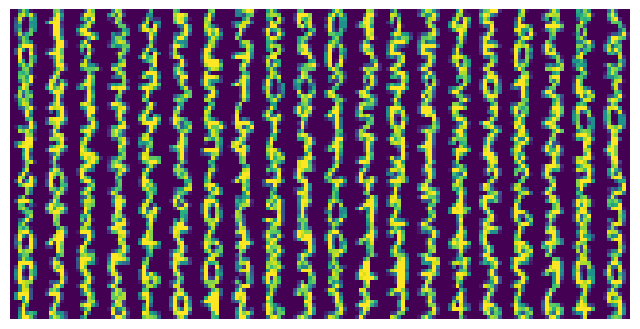

In [54]:

n_cols = 20
n_rows = 10
n_display = n_rows * n_cols

# 字符数据可视化（串串烧方式）
def plot_digits(instances, images_per_row=10):
    size = 8
    
    n_cols = min(len(instances), images_per_row)
    n_rows = (len(instances) - 1) // n_cols + 1
    n_empty = n_rows * n_cols - len(instances)   # 空白图像数量
    
    # N + n_empty = n_cols * n_rows
    images = [instance.reshape(size, size) for instance in instances]   # [N, 64] -> [N, 8, 8]
    images.append(np.zeros((size, size * n_empty)))
    
    # 图像拼接
    row_images = []
    for row in range(n_rows):
        r_images = images[row * n_cols : (row + 1) * n_cols]
        row_images.append(np.concatenate(r_images, axis=1))
    image = np.concatenate(row_images, axis=0)
    
    # 显示图像
    plt.imshow(image, cmap=plt.colormaps['viridis'])
    plt.axis("off")
    
plt.figure(figsize=(8, 8))
example_images = X[:n_display]
plot_digits(example_images, images_per_row=n_cols)
plt.show()

In [55]:

# LDA + KNN
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier as KNN


def LDA_KNN(n_neighbors=1):
    """
    LDA 降维后使用 KNN 分类器进行分类，并计算分类精度。
    Args:
        n_neighbors: 分类器 K 的值，即 KNN 分类器的 k 值。
    """
    # 创建 LDA 模型对训练数据和测试数据进行降维
    lda = LDA(n_components=2)
    X_r2_train = lda.fit_transform(X_train, y_train)
    X_r2_test = lda.transform(X_test)
    
    # 使用 KNN 分类器对降维后的数据进行分类
    knn = KNN(n_neighbors=n_neighbors)
    knn.fit(X_r2_train, y_train)
    y_pred = knn.predict(X_r2_test)
    
    # 计算分类精度
    accuracy = np.mean(y_pred == y_test)
    return accuracy

LDA_KNN(n_neighbors=1)

np.float64(0.5777777777777777)

In [56]:

# PCA + KNN 
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier as KNN


def PCA_KNN(n_neighbors=2):
    """
    PCA 降维后使用 KNN 分类器进行分类，并计算分类精度。
    Args:
        n_neighbors: 降维后的维度数。
    """
    # 创建 PCA 模型对训练数据和测试数据进行降维
    pca = PCA(n_components=2)
    X_pca_train = pca.fit_transform(X_train)
    X_pca_test = pca.transform(X_test)
    
    # 使用 KNN 分类器对降维后的数据进行分类
    knn = KNN(n_neighbors=n_neighbors)
    knn.fit(X_pca_train, y_train)
    y_pred = knn.predict(X_pca_test)
    
    # 计算分类精度
    accuracy = np.mean(y_pred == y_test)
    return accuracy

PCA_KNN(n_neighbors=1)

np.float64(0.5833333333333334)

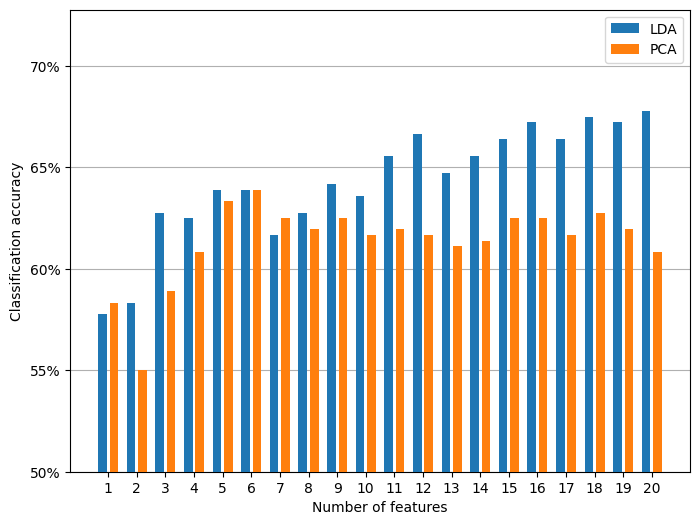

In [57]:

width = 0.3

# 绘制从 n_features=1 到 n_features=20 的分类精度对比柱状图
n_neighbors = 20
n_features_list = range(1, n_neighbors + 1)
LDA_accuracy_list = [LDA_KNN(n_neighbors=n) for n in n_features_list]
PCA_accuracy_list = [PCA_KNN(n_neighbors=n) for n in n_features_list]

# 柱状图的 x 轴坐标
x = np.arange(1, n_neighbors + 1)
x_lda = x - width / 2 - 0.05
x_pca = x + width / 2 + 0.05


plt.figure(figsize=(8, 6))

# 设置刻度、标签和显示范围
plt.xlabel('Number of features')
plt.ylabel('Classification accuracy')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f"{x * 100:.0f}%"))
plt.xticks(x)
plt.ylim(min(LDA_accuracy_list + PCA_accuracy_list) - 0.05, max(LDA_accuracy_list + PCA_accuracy_list) + 0.05)
plt.grid(axis='y')

# 绘制两条柱状图
plt.bar(x_lda, LDA_accuracy_list, width=width, label='LDA', zorder=3)
plt.bar(x_pca, PCA_accuracy_list, width=width, label='PCA', zorder=3)

# 显示图例
plt.legend()

# 显示图像
plt.show()